In [1]:
import sys
from sklearn.ensemble import GradientBoostingClassifier
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.Ingestion.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing.Preprocessing import preprocess_data
from FeatureExtraction.Rand.Rand import apply_rand

In [2]:
mlq.start_quest('Rand-GB', table_dest='../../')

#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 125.74it/s]
../../DataPreparation/Ingestion/Ingestion.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data,  y_data = np.array(x_data), np.array(y_data)


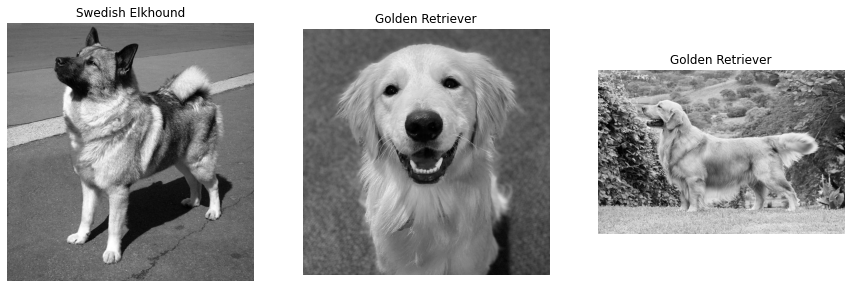

In [3]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [4]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [5]:
x_train_f, x_val_f = mlq.l(apply_rand)(x_train_p, x_val_p, num_samples=99)

#### Initiating the Model

In [6]:
model = mlq.l(GradientBoostingClassifier)(n_estimators=99, learning_rate=30, max_depth=6, random_state=0)

#### Training the model

In [7]:
model.fit(x_train_f, y_train_i)

GradientBoostingClassifier(learning_rate=30, max_depth=6, n_estimators=99,
                           random_state=0)

#### Validate the model

In [8]:
accuracy = model.score(x_val_f, y_val_i).item()
mlq.log_metrics(accuracy)

In [9]:
mlq.end_quest()